# Módulo 9 - Regressão Polimonial


In [7]:
"""
Regressão Polimonial
"""

# EAD
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### AED


#### Carga de Dados


Nesta aula, vamos analisar um arquivo CSV que contém informações sobre salários de funcionários de uma empresa. O arquivo possui três colunas: tempo na empresa, nível na empresa e salário em reais. Vamos importar as bibliotecas necessárias e inspecionar a estrutura do DataFrame. Observamos que o arquivo possui mil entradas, representando mil funcionários. Não há valores ausentes e os tipos de dados foram corretamente capturados. O tempo na empresa é dado em meses e o nível na empresa varia de 1 a 10. Vamos fazer cópias do DataFrame para realizar a análise exploratória e o bucketing, que é uma análise baseada em agrupamentos numéricos. No próximo vídeo, começaremos o projeto prático de regressão polinomial.


In [8]:
# carregar dataset
df_salarios = pd.read_csv("../datasets/dataset_salario.csv")
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [11]:
# copiar DF para DF_EDA + DF_Bucketing
df_salarios_eda = df_salarios.copy()
df_salarios_bucketing = df_salarios.copy()

#### Medidas Estatísticas e Análise Gráfica BoxPlot


Neste vídeo, começamos a análise exploratória dos dados. Primeiro, verificamos se há valores ausentes no nosso dataframe e constatamos que não há. Em seguida, extraímos as medidas estatísticas do dataframe para avaliar a estrutura dos dados. Observamos que a variável "tempo na empresa" varia de 1 a 120 meses, a variável "nível na empresa" varia de 1 a 10 e a variável "salário em reais" varia de R$ 538,56 a R$ 18.000. Notamos que a média do salário é de R$ 5.000, mas a mediana é de R$ 3.237, indicando uma possível distribuição não normal. Em seguida, verificamos a presença de outliers por meio de boxplots e identificamos alguns outliers na variável "salário em reais". No entanto, decidimos não removê-los, pois foram considerados corretos pelo especialista do negócio. Este foi apenas um primeiro olhar nos dados e continuaremos a análise no próximo vídeo.


In [13]:
# listar primieiras linhas do DataFrame
df_salarios_eda.head(7)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35


In [14]:
# detectar valores ausentes - não há
df_salarios_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [15]:
# resumo de medidas estatísticas
df_salarios_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

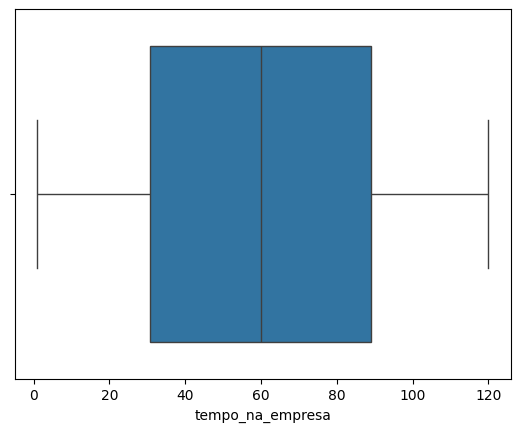

In [16]:
# verificar / detectar outliers - tempo na empresa
sns.boxplot(data=df_salarios_eda, x="tempo_na_empresa")

<Axes: xlabel='nivel_na_empresa'>

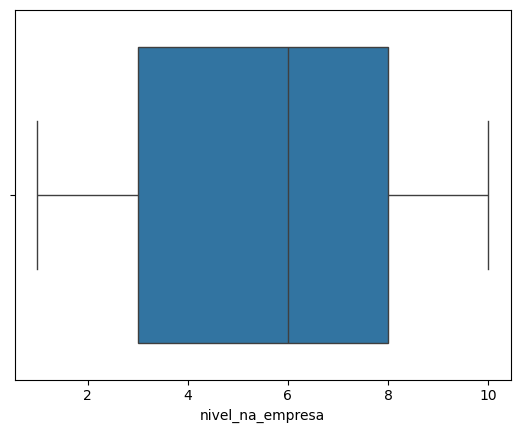

In [17]:
# verificar / detectar outliers - nível na empresa
sns.boxplot(data=df_salarios_eda, x="nivel_na_empresa")

<Axes: xlabel='salario_em_reais'>

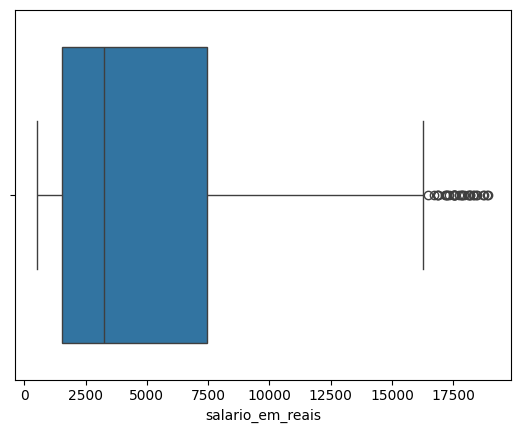

In [18]:
# verificar / detectar outliers - salário
sns.boxplot(data=df_salarios_eda, x="salario_em_reais")

#### Análise Gráfica Scatterplot e Histogramas


Nesta aula, continuamos nossa análise exploratória de dados, focando no cruzamento das variáveis numéricas com o tempo na empresa. Utilizamos o gráfico de scatter plot para identificar padrões entre essas variáveis. Observamos que a relação entre tempo na empresa e salário em reais não é linear, mas sim curva. Para lidar com essa situação, introduzimos o modelo de regressão polinomial. Também cruzamos a variável nível na empresa, que é quase categórica, e notamos que não há um padrão definido. Além disso, fizemos o cruzamento entre nível na empresa e tempo na empresa, e novamente não encontramos um padrão claro. Por fim, utilizamos o diagrama de per-plot para visualizar os histogramas das variáveis e concluímos que há uma relação forte entre tempo na empresa e salário em reais, mas não linear. Não encontramos correlações visíveis entre as variáveis. No próximo vídeo, veremos a correlação entre elas.


<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

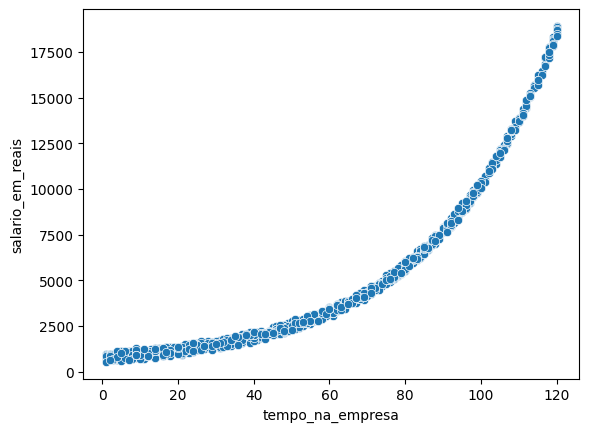

In [19]:
# cruzar variáveis numéricas com salário em reais (variável depensente)
sns.scatterplot(data=df_salarios_eda,
                x="tempo_na_empresa", y="salario_em_reais")

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

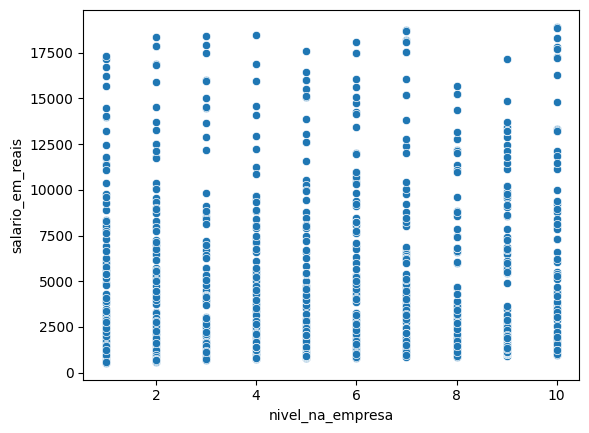

In [21]:
# cruzar variáveis numéricas com salário em reais (variável depensente)
sns.scatterplot(data=df_salarios_eda, x="nivel_na_empresa", y="salario_em_reais")

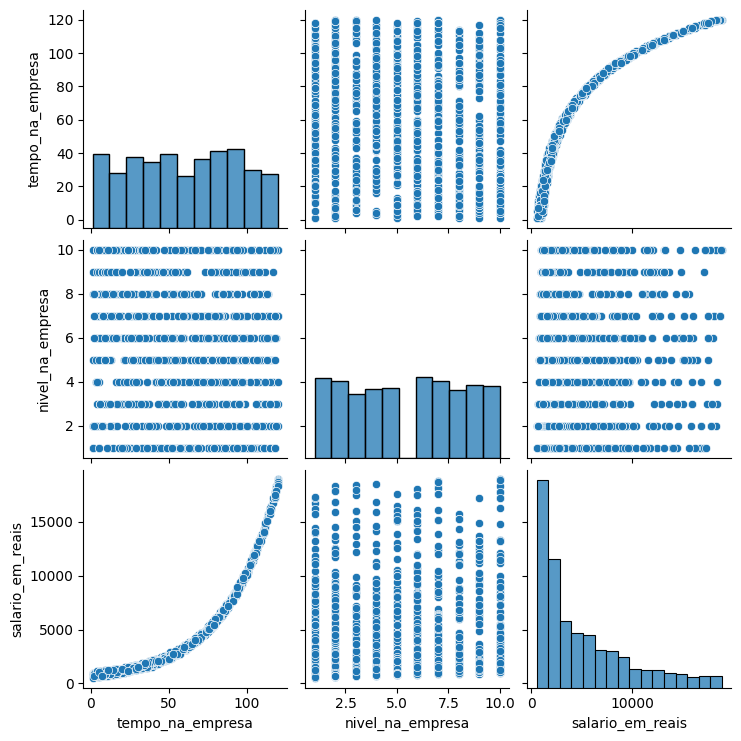

In [22]:
# histograma das variáveis
sns.pairplot(df_salarios_eda)

#### Análise de Correlação


Neste vídeo, vamos criar um diagrama de correlação usando um mapa de calor. Usaremos o método `heatmap` e o valor padrão de correlação de Pearson. Observamos que a correlação entre o nível da empresa e o tempo da empresa é fraca, assim como a correlação entre o nível da empresa e o salário em reais. No entanto, a correlação entre o tempo da empresa e o salário em reais é de 0.91, indicando uma correlação forte. Em seguida, exploramos a correlação de Spearman, que captura correlações não lineares. Ao usar Spearman, a correlação entre o tempo da empresa e o salário em reais aumenta para 1, indicando uma correlação quase perfeita e positiva. Isso sugere que essas variáveis podem estar relacionadas de forma não linear. Também criamos um gráfico de formato de ranking, que mostra a ordem das correlações de forma descendente. Observamos que o nível da empresa tem uma correlação muito baixa com o salário em reais, enquanto o tempo da empresa tem uma contribuição significativa.


<Axes: >

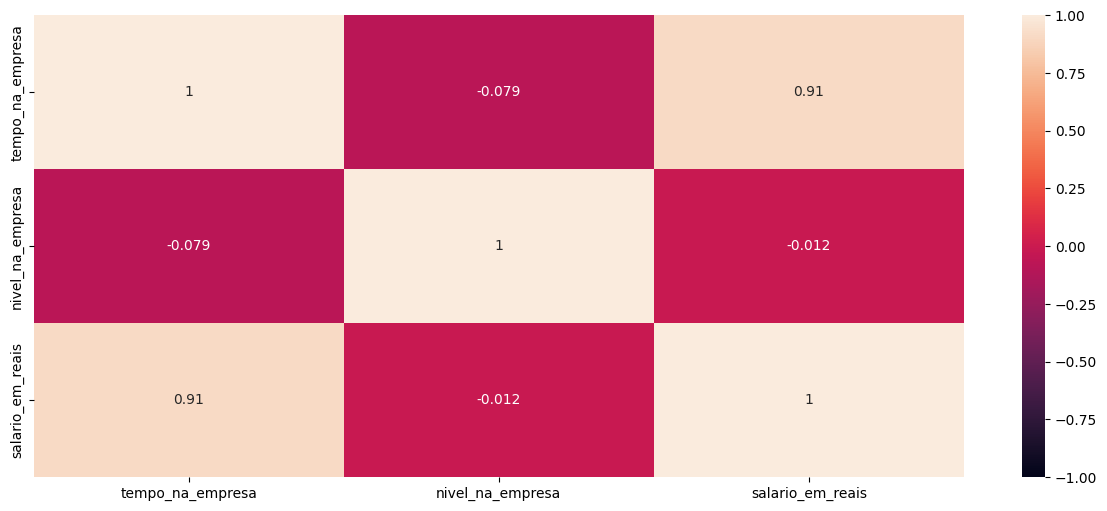

In [23]:
# exibir mapa de calor
plt.figure(figsize=(15, 6))
sns.heatmap(df_salarios_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

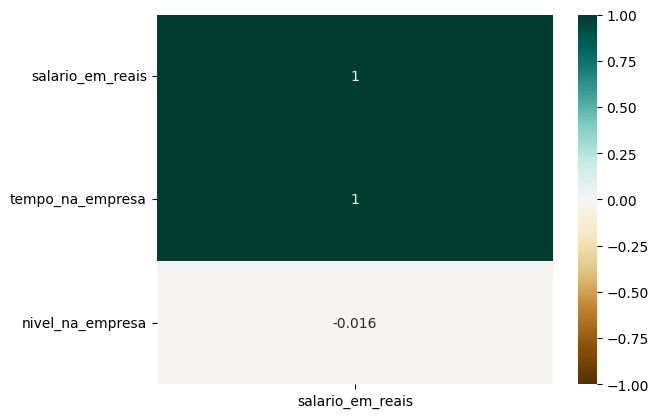

In [24]:
sns.heatmap(
    df_salarios_eda.corr("spearman")[["salario_em_reais"]].sort_values(
        by="salario_em_reais", ascending=False
    ),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
)

#### Análise Gráfica - Bucketing


Neste vídeo, concluímos nossa análise exploratória de dados utilizando o método de bucketing. Utilizamos a variável "tempo de casa" para agrupar os dados em faixas, já que essa variável possui uma ampla gama de valores. Criamos os buckets com intervalos de 10 em 10 anos, de 0 a 120. Em seguida, utilizamos a função cut do pandas para cortar os dados de acordo com esses buckets. Em seguida, plotamos um boxplot para analisar a relação entre o tempo de casa e o salário. Observamos que, assim como no gráfico de dispersão, há uma tendência de aumento do salário conforme o tempo de casa aumenta, mas não segue uma relação linear. Concluímos a análise exploratória e nos próximos vídeos começaremos a trabalhar no treinamento e validação do modelo.


In [27]:
# bucketingt tempo de casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = [
    "0-9",
    "10-19",
    "20-29",
    "30-39",
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100-109",
    "110-119",
    "120-129",
]
df_salarios_bucketing["escala_tempo"] = pd.cut(
    df_salarios_bucketing["tempo_na_empresa"],
    bins=bins_tempo_casa,
    labels=labels_tempo_casa,
    include_lowest=True,
)
df_salarios_bucketing.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

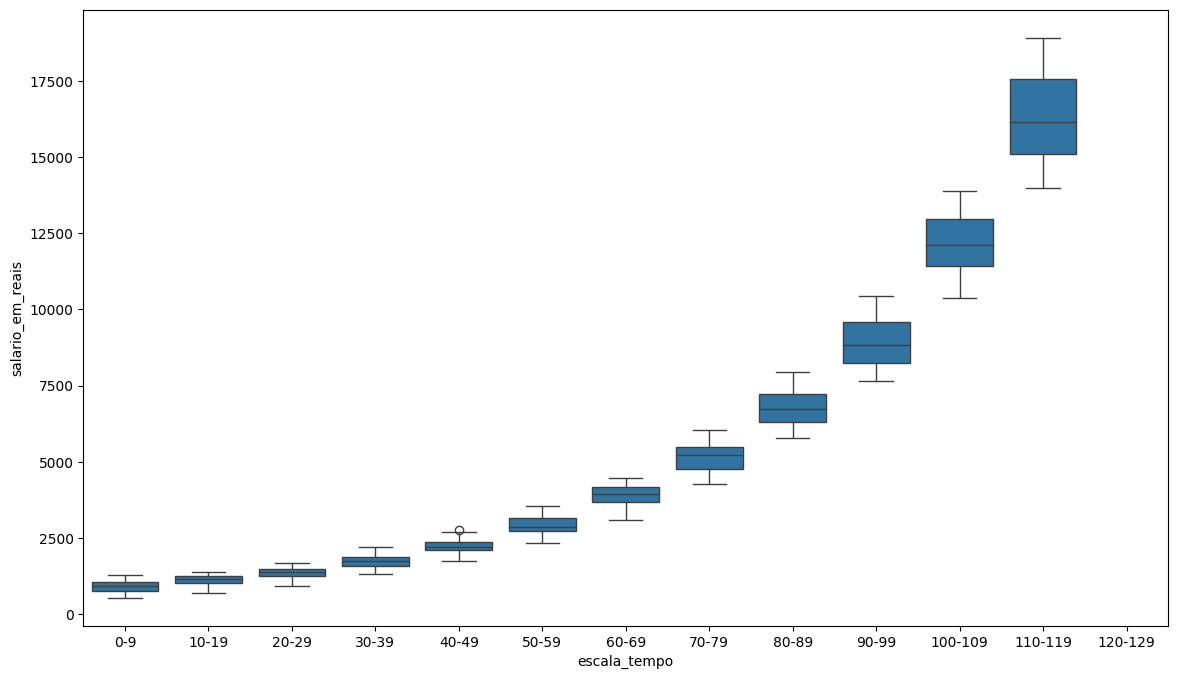

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(df_salarios_bucketing, x='escala_tempo', y="salario_em_reais")